# Machine Learning

Using the dataset from https://archive.ics.uci.edu/ml/datasets/Car+Evaluation, create a machine learning model to predict the buying price given the following parameters:

**Attributes**  
buying:   vhigh, high, med, low  
maint:    vhigh, high, med, low  
doors:    2, 3, 4, 5more  
persons:  2, 4, more  
lug_boot: small, med, big  
safety:   low, med, high  

## Data exploration

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('car.data', header=None)

In [3]:
# Add headers to the dataframe
df.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [4]:
# Drop persons
df.drop('persons', axis=1, inplace=True)

In [5]:
df.head()

,buying,maint,doors,lug_boot,safety,class
0,vhigh,vhigh,2,small,low,unacc
1,vhigh,vhigh,2,small,med,unacc
2,vhigh,vhigh,2,small,high,unacc
3,vhigh,vhigh,2,med,low,unacc
4,vhigh,vhigh,2,med,med,unacc


In [6]:
df.shape

(1728, 6)

In [7]:
# Check for nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   lug_boot  1728 non-null   object
 4   safety    1728 non-null   object
 5   class     1728 non-null   object
dtypes: object(6)
memory usage: 81.1+ KB


In [8]:
# Summarize each feature
df.apply(lambda x: x.value_counts()).T.stack()

buying    high      432.0
          low       432.0
          med       432.0
          vhigh     432.0
maint     high      432.0
          low       432.0
          med       432.0
          vhigh     432.0
doors     2         432.0
          3         432.0
          4         432.0
          5more     432.0
lug_boot  big       576.0
          med       576.0
          small     576.0
safety    high      576.0
          low       576.0
          med       576.0
class     acc       384.0
          good       69.0
          unacc    1210.0
          vgood      65.0
dtype: float64

## Feature selection

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [10]:
x = df.drop(['buying'], axis=1)
y = df['buying']

In [11]:
x

,maint,doors,lug_boot,safety,class
0,vhigh,2,small,low,unacc
1,vhigh,2,small,med,unacc
2,vhigh,2,small,high,unacc
3,vhigh,2,med,low,unacc
4,vhigh,2,med,med,unacc
...,...,...,...,...,...
1723,low,5more,med,med,good
1724,low,5more,med,high,vgood
1725,low,5more,big,low,unacc
1726,low,5more,big,med,good


In [12]:
# Transform categorical features as integer array (for use with classification)
enc = OrdinalEncoder(
    categories=[['low','med','high','vhigh'],
        ['2','3','4','5more'],
        ['small','med','big'],
        ['low','med','high'],
        ['unacc','acc','good','vgood']
    ])
x = enc.fit_transform(x)

In [13]:
x

array([[3., 0., 0., 0., 0.],
       [3., 0., 0., 1., 0.],
       [3., 0., 0., 2., 0.],
       ...,
       [0., 3., 2., 0., 0.],
       [0., 3., 2., 1., 2.],
       [0., 3., 2., 2., 3.]])

In [14]:
enc.categories_

[array(['low', 'med', 'high', 'vhigh'], dtype=object),
 array(['2', '3', '4', '5more'], dtype=object),
 array(['small', 'med', 'big'], dtype=object),
 array(['low', 'med', 'high'], dtype=object),
 array(['unacc', 'acc', 'good', 'vgood'], dtype=object)]

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [16]:
x_train.shape, x_test.shape

((1209, 5), (519, 5))

In [17]:
y_train.shape, y_test.shape

((1209,), (519,))

## Decision Tree Model

In [18]:
# Start with a single decision tree as the model
clf = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=0)

In [19]:
clf = clf.fit(x_train, y_train)
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

In [20]:
# Accuracies for train and test set (should be similar otherwise overfitting is possible)
print("Accuracy:",metrics.accuracy_score(y_train, y_train_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))

Accuracy: 0.3308519437551696
Accuracy: 0.30828516377649323


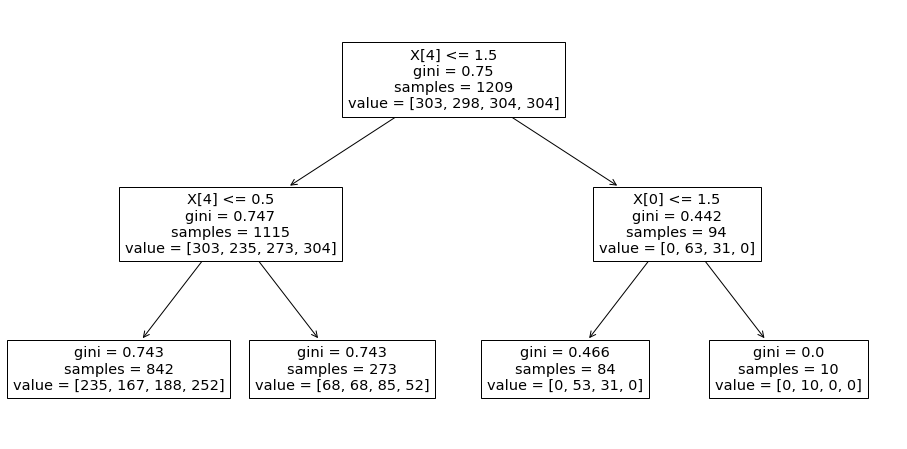

In [21]:
from sklearn import tree
import matplotlib.pyplot as plt # data visualization
plt.figure(figsize=(16,8))

tree.plot_tree(clf.fit(x_train, y_train));

In [22]:
cm = confusion_matrix(y_test, y_test_pred)
print('Confusion matrix:\n', cm)

Confusion matrix:
 [[  0   0  40  89]
 [  0  22  21  91]
 [  0  18  30  80]
 [  0   0  20 108]]


**Mapping the parameters to be predicted (zero indexing):**  
Maintenance = High (2)  
Number of doors = 4 (2)  
Lug Boot Size = Big (2)  
Safety = High (2)  
Class Value = Good (2)

In [23]:
# Buying price predicted as low
clf.predict(np.array([2,2,2,2,2]).reshape(1,-1))

array(['low'], dtype=object)

In [24]:
## Random Forest Classifier

In [25]:
# Use a random forest classifier
rfc = RandomForestClassifier(n_estimators=10, random_state=0)

In [26]:
rfc = rfc.fit(x_train, y_train)
y_train_pred = rfc.predict(x_train)
y_test_pred = rfc.predict(x_test)

In [27]:
# Accuracies for train and test set (should be similar otherwise overfitting is possible)
print("Accuracy:",metrics.accuracy_score(y_train, y_train_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))

Accuracy: 0.44747725392886684
Accuracy: 0.14065510597302505


In [28]:
# Order of importance of features
feature_scores = pd.Series(clf.feature_importances_, index=['maint', 'doors', 'lug_boot', 'safety', 'class']).sort_values(ascending=False)
feature_scores

class       0.937526
maint       0.062474
safety      0.000000
lug_boot    0.000000
doors       0.000000
dtype: float64

In [29]:
# Buying price also predicted as low
clf.predict(np.array([2,2,2,2,2]).reshape(1,-1))

array(['low'], dtype=object)

## Conclusion

* Single Decision Tree outperformed Random Forest Classifier
* Results for both models unsatisfactory 
* Dependent variables inadequate in predicting buying price of a car